In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_train = pd.read_excel('./data/train_clientes.xlsx', index_col='ID_CORRELATIVO')
df_test = pd.read_excel('./data/test_clientes.xlsx', index_col='ID_CORRELATIVO')
df_train_req = pd.read_excel('./data/train_requerimientos.xlsx')
df_test_req = pd.read_excel('./data/test_requerimientos.xlsx')

x_train = df_train.drop(['ATTRITION'], axis=1)
y_train = df_train['ATTRITION']
x_test = df_test

print x_train.shape
print y_train.shape
print x_test.shape

(70000, 51)
(70000L,)
(30000, 51)


# 1. Exploring data

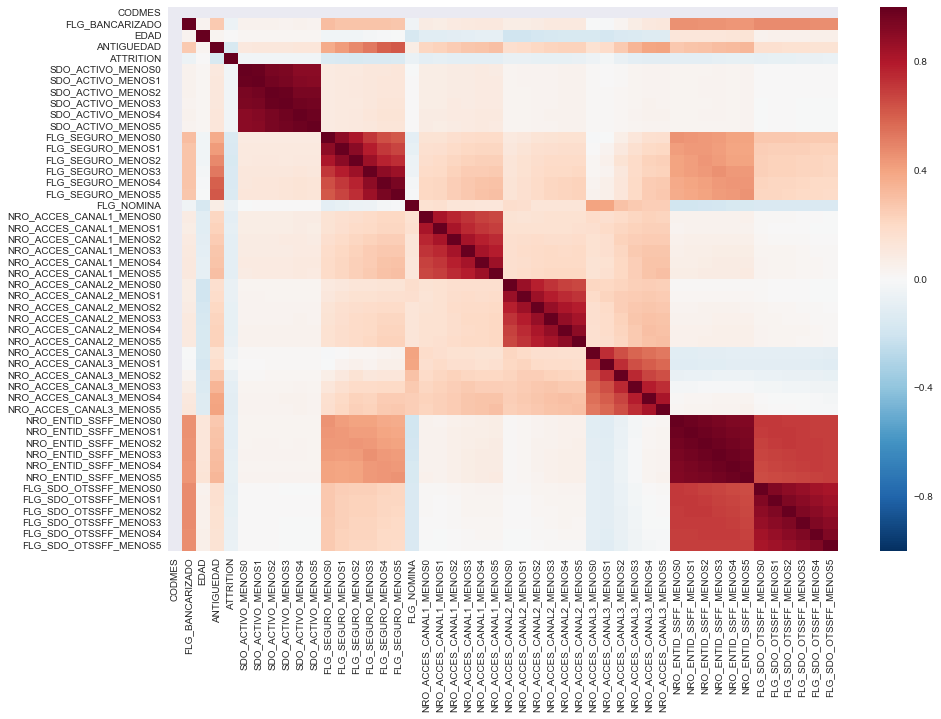

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_train.corr());

In [11]:
num_cols = x_train.select_dtypes(exclude=['datetime', 'object']).columns.tolist()
cat_cols = [col for col in x_train.columns if col not in num_cols]

## Edad

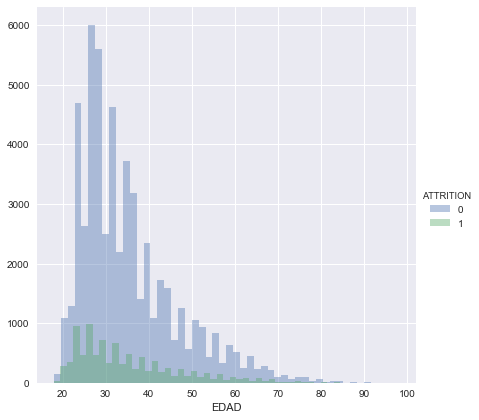

In [8]:
g = sns.FacetGrid(df_train, hue="ATTRITION", size=6)
g.map(sns.distplot, "EDAD", kde=False).add_legend();

## Antiguedad

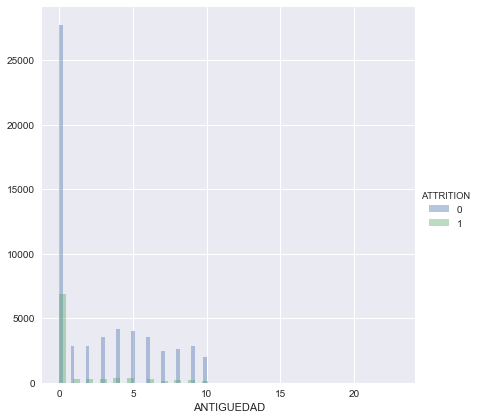

In [9]:
g = sns.FacetGrid(df_train, hue="ATTRITION", size=6)
g.map(sns.distplot, "ANTIGUEDAD", kde=False).add_legend();

In [9]:
df_train["ANTIGUEDAD"].value_counts()

0.0     34701
4.0      4492
5.0      4378
3.0      3845
6.0      3783
2.0      3178
1.0      3164
9.0      3063
8.0      2841
7.0      2663
10.0     2114
20.0        5
12.0        3
18.0        1
16.0        1
15.0        1
17.0        1
14.0        1
23.0        1
13.0        1
19.0        1
Name: ANTIGUEDAD, dtype: int64

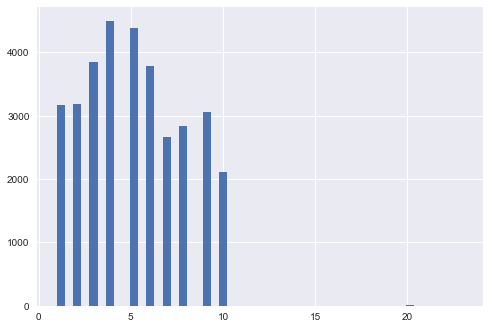

In [10]:
df_train.loc[df_train.ANTIGUEDAD != 0, "ANTIGUEDAD"].hist(bins=50);

In [12]:
def mc_antig(df):
    df['MC_ANTIG'] = df['ANTIGUEDAD'].apply(lambda x: 1 if x == 0. else 0)
    df.drop('ANTIGUEDAD', inplace=True, axis=1)

mc_antig(x_train)

## Codmes

In [13]:
# CODMES doesn't add information then it will be remove
x_train.drop('CODMES', inplace=True, axis=1)

## Sdo activo

In [14]:
x_train[['SDO_ACTIVO_MENOS{0}'.format(i) for i in range(6)]]

,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5
ID_CORRELATIVO,,,,,,
35653,0,0,0,0,0,0
66575,0,0,0,0,0,0
56800,0,0,0,0,0,0
8410,0,0,0,0,0,0
6853,0,0,0,0,0,0
22240,0,0,0,0,0,0
86930,0,0,0,0,0,0
88272,0,0,0,0,0,0
94608,0,0,0,0,0,0


In [15]:
def prom_saldo_act(df):
    mn = df[['SDO_ACTIVO_MENOS{0}'.format(i) for i in range(6)]].apply(lambda x: np.mean(x) , axis=1)
    act = df[['SDO_ACTIVO_MENOS{0}'.format(i) for i in range(6)]].apply(lambda x: np.count_nonzero(x) , axis=1)
    df['SDO_ACTIVO_PROM'] = mn
    df['NMESES_SDO_ACTIVO'] = act
    df.drop(['SDO_ACTIVO_MENOS{0}'.format(i) for i in range(6)], inplace=True, axis=1)
    
prom_saldo_act(x_train)

## Flg seguro

In [16]:
x_train[['FLG_SEGURO_MENOS{0}'.format(i) for i in range(6)]]

,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5
ID_CORRELATIVO,,,,,,
35653,1,1,1,1,1,1
66575,0,0,0,0,0,0
56800,0,0,0,0,0,0
8410,1,1,1,1,1,1
6853,0,0,0,0,0,0
22240,0,0,0,0,0,0
86930,1,1,1,0,0,0
88272,0,0,0,0,0,0
94608,0,0,0,0,0,0


In [17]:
def range_flg_seguro(df):
    nmonths = df[['FLG_SEGURO_MENOS{0}'.format(i) for i in range(6)]].apply(lambda x: sum(x) , axis=1)
    df['FLG_SEGURO_6M'] = nmonths.apply(lambda x: 1 if x==6 else 0)
    df['FLG_SEGURO_0M'] = nmonths.apply(lambda x: 1 if x==0 else 0)
    df['FLG_SEGURO_1-5M'] = nmonths.apply(lambda x: 1 if 0<x<6 else 0)
    df.drop(['FLG_SEGURO_MENOS{0}'.format(i) for i in range(6)], inplace=True, axis=1)

range_flg_seguro(x_train)

## Nro_access_canal1

In [18]:
x_train[['NRO_ACCES_CANAL1_MENOS{0}'.format(i) for i in range(6)]]

,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5
ID_CORRELATIVO,,,,,,
35653,2,1,0,2,4,1
66575,0,0,0,0,0,0
56800,0,0,0,0,0,0
8410,0,0,0,0,0,0
6853,0,0,0,0,0,0
22240,0,0,0,0,0,0
86930,0,0,0,0,0,0
88272,0,0,0,0,0,0
94608,0,0,0,0,0,0


In [19]:
def prom_nro_acces_canal1(df):
    mn = df[['NRO_ACCES_CANAL1_MENOS{0}'.format(i) for i in range(6)]].apply(
                    lambda x: np.mean(x) , axis=1)
    act = df[['NRO_ACCES_CANAL1_MENOS{0}'.format(i) for i in range(6)]].apply(
                    lambda x: np.count_nonzero(x) , axis=1)
    df['ACCES_CANAL1_PROM'] = mn
    df['NMESES_CANAL1_ACTIVO'] = act
    df.drop(['NRO_ACCES_CANAL1_MENOS{0}'.format(i) for i in range(6)], inplace=True, axis=1)
        
prom_nro_acces_canal1(x_train)

## Nro_access_canal2

In [20]:
x_train[['NRO_ACCES_CANAL2_MENOS{0}'.format(i) for i in range(6)]]

,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5
ID_CORRELATIVO,,,,,,
35653,8,11,14,12,8,12
66575,0,0,0,0,0,0
56800,0,0,0,0,0,0
8410,0,0,0,0,0,0
6853,0,0,0,0,0,0
22240,0,0,0,0,0,0
86930,0,0,0,0,0,0
88272,0,0,0,0,0,0
94608,0,0,0,0,0,0


In [21]:
def prom_nro_acces_canal2(df):
    mn = df[['NRO_ACCES_CANAL2_MENOS{0}'.format(i) for i in range(6)]].apply(
                    lambda x: np.mean(x) , axis=1)
    act = df[['NRO_ACCES_CANAL2_MENOS{0}'.format(i) for i in range(6)]].apply(
                    lambda x: np.count_nonzero(x) , axis=1)
    df['ACCES_CANAL2_PROM'] = mn
    df['NMESES_CANAL2_ACTIVO'] = act
    df.drop(['NRO_ACCES_CANAL2_MENOS{0}'.format(i) for i in range(6)], inplace=True, axis=1)
    
prom_nro_acces_canal2(x_train)

## Nro_access_canal3

In [22]:
x_train[['NRO_ACCES_CANAL3_MENOS{0}'.format(i) for i in range(6)]]

,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5
ID_CORRELATIVO,,,,,,
35653,3,0,1,6,2,5
66575,24,0,0,0,0,0
56800,0,0,0,8,0,2
8410,0,1,1,0,2,0
6853,0,0,0,0,0,0
22240,6,0,0,0,0,0
86930,0,0,0,0,0,0
88272,14,7,11,2,0,0
94608,7,17,10,3,0,0


In [23]:
def prom_nro_acces_canal3(df):
    mn = df[['NRO_ACCES_CANAL3_MENOS{0}'.format(i) for i in range(6)]].apply(
                    lambda x: np.mean(x) , axis=1)
    act = df[['NRO_ACCES_CANAL3_MENOS{0}'.format(i) for i in range(6)]].apply(
                    lambda x: np.count_nonzero(x) , axis=1)
    df['ACCES_CANAL3_PROM'] = mn
    df['NMESES_CANAL3_ACTIVO'] = act
    df.drop(['NRO_ACCES_CANAL3_MENOS{0}'.format(i) for i in range(6)], inplace=True, axis=1)
    
prom_nro_acces_canal3(x_train)

## Nro entid ssff

In [24]:
x_train[['NRO_ENTID_SSFF_MENOS{0}'.format(i) for i in range(6)]]

,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5
ID_CORRELATIVO,,,,,,
35653,2,1,1,1,1,1
66575,1,1,1,1,1,1
56800,0,0,0,0,0,0
8410,3,3,3,3,3,3
6853,0,0,0,0,0,0
22240,0,0,0,0,0,0
86930,3,3,3,2,2,2
88272,0,0,0,0,0,0
94608,0,0,0,0,0,0


In [25]:
def prom_ent_ssff(df):
    mn = df[['NRO_ENTID_SSFF_MENOS{0}'.format(i) for i in range(6)]].apply(
                    lambda x: np.mean(x) , axis=1)
    act = df[['NRO_ENTID_SSFF_MENOS{0}'.format(i) for i in range(6)]].apply(
                    lambda x: np.count_nonzero(x) , axis=1)
    df['ENT_SSFF_PROM'] = mn
    df['ENT_SSFF_ACTIVO'] = act
    df.drop(['NRO_ENTID_SSFF_MENOS{0}'.format(i) for i in range(6)], inplace=True, axis=1)

prom_ent_ssff(x_train)

## Flg sdo otssff

In [26]:
x_train[['FLG_SDO_OTSSFF_MENOS{0}'.format(i) for i in range(6)]]

,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
ID_CORRELATIVO,,,,,,
35653,1,0,0,0,0,0
66575,0,0,0,0,0,0
56800,0,0,0,0,0,0
8410,1,1,1,1,1,1
6853,0,0,0,0,0,0
22240,0,0,0,0,0,0
86930,1,1,1,1,1,1
88272,0,0,0,0,0,0
94608,0,0,0,0,0,0


In [27]:
x_train[['FLG_SDO_OTSSFF_MENOS{0}'.format(i) for i in range(6)]].apply(lambda x: sum(x) , axis=1).value_counts()

6    32832
0    28904
5     2416
4     1779
3     1460
1     1327
2     1282
dtype: int64

In [28]:
def range_flg_otssff(df):
    nmonths = df[['FLG_SDO_OTSSFF_MENOS{0}'.format(i) for i in range(6)]].apply(lambda x: sum(x) , axis=1)
    df['FLG_OTSSFF_6M'] = nmonths.apply(lambda x: 1 if x==6 else 0)
    df['FLG_OTSSFF_0M'] = nmonths.apply(lambda x: 1 if x==0 else 0)
    df['FLG_OTSSFF_1-5M'] = nmonths.apply(lambda x: 1 if 0<x<6 else 0)
    df.drop(['FLG_SDO_OTSSFF_MENOS{0}'.format(i) for i in range(6)], inplace=True, axis=1)

range_flg_otssff(x_train)

## Categorical features

In [29]:
df_train[cat_cols].head(5)

,RANG_INGRESO,FLAG_LIMA_PROVINCIA,RANG_SDO_PASIVO_MENOS0,RANG_NRO_PRODUCTOS_MENOS0
ID_CORRELATIVO,,,,
35653,Rang_ingreso_06,Lima,Rango_SDO_09,Rango_04
66575,Rang_ingreso_03,Provincia,Rango_SDO_01,Rango_02
56800,Rang_ingreso_01,Provincia,Rango_SDO_02,Rango_02
8410,Rang_ingreso_04,Provincia,Rango_SDO_03,Rango_03
6853,NaN,Lima,Rango_SDO_01,Rango_01


In [30]:
dm1 = pd.get_dummies(x_train[cat_cols[0]], prefix=cat_cols[0], prefix_sep='__')
dm2 = pd.get_dummies(x_train[cat_cols[1]], prefix=cat_cols[1], prefix_sep='__')
dm3 = pd.get_dummies(x_train[cat_cols[2]], prefix=cat_cols[2], prefix_sep='__')
dm4 = pd.get_dummies(x_train[cat_cols[3]], prefix=cat_cols[3], prefix_sep='__')

x_train_ = pd.concat([x_train, dm1, dm2, dm3, dm4], axis=1)
x_train_.drop(cat_cols, inplace=True, axis=1)
x_train_.head(5)

,FLG_BANCARIZADO,EDAD,FLG_NOMINA,MC_ANTIG,SDO_ACTIVO_PROM,NMESES_SDO_ACTIVO,FLG_SEGURO_6M,FLG_SEGURO_0M,FLG_SEGURO_1-5M,ACCES_CANAL1_PROM,...,RANG_SDO_PASIVO_MENOS0__Rango_SDO_11,RANG_SDO_PASIVO_MENOS0__Rango_SDO_12,RANG_SDO_PASIVO_MENOS0__Rango_SDO_13,RANG_SDO_PASIVO_MENOS0__Rango_SDO_14,RANG_NRO_PRODUCTOS_MENOS0__Rango_01,RANG_NRO_PRODUCTOS_MENOS0__Rango_02,RANG_NRO_PRODUCTOS_MENOS0__Rango_03,RANG_NRO_PRODUCTOS_MENOS0__Rango_04,RANG_NRO_PRODUCTOS_MENOS0__Rango_05,RANG_NRO_PRODUCTOS_MENOS0__Rango_06
ID_CORRELATIVO,,,,,,,,,,,,,,,,,,,,,
35653,1,25.0,0,0,0.0,0,1,0,0,1.666667,...,0,0,0,0,0,0,0,1,0,0
66575,1,27.0,1,1,0.0,0,0,1,0,0.000000,...,0,0,0,0,0,1,0,0,0,0
56800,1,34.0,1,0,0.0,0,0,1,0,0.000000,...,0,0,0,0,0,1,0,0,0,0
8410,1,63.0,0,0,0.0,0,1,0,0,0.000000,...,0,0,0,0,0,0,1,0,0,0
6853,1,25.0,0,1,0.0,0,0,1,0,0.000000,...,0,0,0,0,1,0,0,0,0,0


In [31]:
# Apply the same transformations to x_test

mc_antig(x_test)
x_test.drop('CODMES', inplace=True, axis=1)
prom_saldo_act(x_test)
range_flg_seguro(x_test)
prom_nro_acces_canal1(x_test)
prom_nro_acces_canal2(x_test)
prom_nro_acces_canal3(x_test)
prom_ent_ssff(x_test)
range_flg_otssff(x_test)

In [32]:
dm1 = pd.get_dummies(x_test[cat_cols[0]], prefix=cat_cols[0], prefix_sep='__')
dm2 = pd.get_dummies(x_test[cat_cols[1]], prefix=cat_cols[1], prefix_sep='__')
dm3 = pd.get_dummies(x_test[cat_cols[2]], prefix=cat_cols[2], prefix_sep='__')
dm4 = pd.get_dummies(x_test[cat_cols[3]], prefix=cat_cols[3], prefix_sep='__')

x_test_ = pd.concat([x_test, dm1, dm2, dm3, dm4], axis=1)
x_test_.drop(cat_cols, inplace=True, axis=1)
x_test_.head(5)

,FLG_BANCARIZADO,EDAD,FLG_NOMINA,MC_ANTIG,SDO_ACTIVO_PROM,NMESES_SDO_ACTIVO,FLG_SEGURO_6M,FLG_SEGURO_0M,FLG_SEGURO_1-5M,ACCES_CANAL1_PROM,...,RANG_SDO_PASIVO_MENOS0__Rango_SDO_11,RANG_SDO_PASIVO_MENOS0__Rango_SDO_12,RANG_SDO_PASIVO_MENOS0__Rango_SDO_13,RANG_SDO_PASIVO_MENOS0__Rango_SDO_14,RANG_NRO_PRODUCTOS_MENOS0__Rango_01,RANG_NRO_PRODUCTOS_MENOS0__Rango_02,RANG_NRO_PRODUCTOS_MENOS0__Rango_03,RANG_NRO_PRODUCTOS_MENOS0__Rango_04,RANG_NRO_PRODUCTOS_MENOS0__Rango_05,RANG_NRO_PRODUCTOS_MENOS0__Rango_06
ID_CORRELATIVO,,,,,,,,,,,,,,,,,,,,,
47411,0,NaN,1,1,0.0,0,0,1,0,0.000000,...,0,0,0,0,0,1,0,0,0,0
39861,1,37.0,1,1,0.0,0,0,1,0,0.000000,...,0,0,0,0,0,1,0,0,0,0
38898,1,26.0,1,0,0.0,0,1,0,0,0.000000,...,0,0,0,0,0,0,1,0,0,0
50927,1,34.0,0,0,0.0,0,0,0,1,0.333333,...,0,0,0,0,0,0,1,0,0,0
32969,1,22.0,0,0,0.0,0,0,0,1,0.000000,...,0,0,0,0,0,1,0,0,0,0


# 2. Requerimientos

In [33]:
def transform_df_req(df):
    
    t1 = pd.pivot_table(df, 
               index='ID_CORRELATIVO',
               columns='TIPO_REQUERIMIENTO2',
               aggfunc='count')['DICTAMEN']
    
    t2 = pd.pivot_table(df, 
               index='ID_CORRELATIVO',
               columns='TIPO_REQUERIMIENTO2',
               aggfunc={'DICTAMEN': 
                        lambda x: sum(map((lambda x: 1 if x in ['PROCEDE TOTAL'] else 0), x))})['DICTAMEN']
    
    # t3 =  seleccionar prod_servicio y submotivo
    
    df_transf = pd.DataFrame(index=t1.index, 
                             data={'Reclamos': t1['Reclamo'], 
                                   'Solicitudes': t1['Solicitud'],
                                   'Rec_proceden': t2['Reclamo'],
                                   'Solic_proceden': t2['Solicitud']})
    
    
    return df_transf # already have index correlative

In [151]:
df_train_req.describe(include=['object'])

,TIPO_REQUERIMIENTO2,DICTAMEN,PRODUCTO_SERVICIO_2,SUBMOTIVO_2
count,51417,51416,51417,51417
unique,2,3,22,85
top,Reclamo,PROCEDE TOTAL,Producto 20,Submotivo 125
freq,37388,25225,22793,18894


In [145]:
# Match req with attririon = 1

y_train.loc[nx_train_req.index].value_counts()

ix_req_att = y_train.loc[nx_train_req.index].loc[lambda x: x==1].index
nx_train_req.loc[ix_req_att].describe()

0    31822
1     3204
Name: ATTRITION, dtype: int64

,Rec_proceden,Reclamos,Solic_proceden,Solicitudes
count,2425.000000,2425.000000,1134.000000,1134.000000
mean,0.551340,1.351340,0.766314,1.131393
std,0.587219,0.793085,0.527340,0.397945
min,0.000000,1.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,4.000000,9.000000,4.000000,4.000000


In [75]:
nx_train_req = transform_df_req(df_train_req)
nx_test_req = transform_df_req(df_test_req)

In [162]:
#nx_train = pd.concat([x_train_, nx_train_req], axis=1)
#nx_test = pd.concat([x_test_, nx_test_req], axis=1)

In [34]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [35]:
x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train_, y_train, test_size=0.25)

dtrain = xgb.DMatrix(x_train_train, label=y_train_train)
dtest = xgb.DMatrix(x_train_test, label=y_train_test)

In [36]:
params = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}

In [37]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=999,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-logloss:0.544762
Will train until Test-logloss hasn't improved in 10 rounds.
[1]	Test-logloss:0.463784
[2]	Test-logloss:0.415205
[3]	Test-logloss:0.385238
[4]	Test-logloss:0.366408
[5]	Test-logloss:0.354129
[6]	Test-logloss:0.345552
[7]	Test-logloss:0.339576
[8]	Test-logloss:0.336351
[9]	Test-logloss:0.332999
[10]	Test-logloss:0.330217
[11]	Test-logloss:0.329094
[12]	Test-logloss:0.327468
[13]	Test-logloss:0.326549
[14]	Test-logloss:0.325725
[15]	Test-logloss:0.324616
[16]	Test-logloss:0.324257
[17]	Test-logloss:0.324029
[18]	Test-logloss:0.323445
[19]	Test-logloss:0.323287
[20]	Test-logloss:0.323136
[21]	Test-logloss:0.323035
[22]	Test-logloss:0.321539
[23]	Test-logloss:0.321462
[24]	Test-logloss:0.321115
[25]	Test-logloss:0.321125
[26]	Test-logloss:0.321189
[27]	Test-logloss:0.321169
[28]	Test-logloss:0.321038
[29]	Test-logloss:0.320815
[30]	Test-logloss:0.320764
[31]	Test-logloss:0.320876
[32]	Test-logloss:0.320832
[33]	Test-logloss:0.319969
[34]	Test-logloss:0.320092
[35]	

In [38]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=999,
    seed=42,
    nfold=5,
    metrics='logloss',
    early_stopping_rounds=10
)

cv_results

,test-logloss-mean,test-logloss-std,train-logloss-mean,train-logloss-std
0,0.546066,0.001342,0.545137,0.000538
1,0.466866,0.001598,0.464941,0.001462
2,0.419733,0.002628,0.416571,0.001466
3,0.390434,0.002770,0.386248,0.001573
4,0.371277,0.003732,0.366264,0.001167
5,0.358879,0.004142,0.352738,0.001265
6,0.350816,0.003859,0.343342,0.001482
7,0.345539,0.003726,0.336778,0.001726
8,0.341915,0.004231,0.331906,0.001103
9,0.339048,0.004151,0.327817,0.001390


In [39]:
# Tunning parameters

gridsearch_params = [(max_depth, min_child_weight)
                    for max_depth in range(9,12)
                    for min_child_weight in range(4,8)]

min_logloss = float("Inf")
best_params = None

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=999,
        seed=42,
        nfold=5,
        metrics='logloss',
        early_stopping_rounds=10
    )

    # Update best logloss
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tLogloss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = (max_depth, min_child_weight)

print("Best params: {}, {}, Logloss: {}".format(best_params[0], best_params[1], min_logloss))

CV with max_depth=9, min_child_weight=4
	Logloss 0.3296708 for 18 rounds
CV with max_depth=9, min_child_weight=5
	Logloss 0.3303034 for 15 rounds
CV with max_depth=9, min_child_weight=6
	Logloss 0.3294678 for 20 rounds
CV with max_depth=9, min_child_weight=7
	Logloss 0.3290368 for 22 rounds
CV with max_depth=10, min_child_weight=4
	Logloss 0.3309928 for 15 rounds
CV with max_depth=10, min_child_weight=5
	Logloss 0.3308402 for 18 rounds
CV with max_depth=10, min_child_weight=6
	Logloss 0.329702 for 19 rounds
CV with max_depth=10, min_child_weight=7
	Logloss 0.330083 for 17 rounds
CV with max_depth=11, min_child_weight=4
	Logloss 0.3325036 for 13 rounds
CV with max_depth=11, min_child_weight=5
	Logloss 0.3320146 for 14 rounds
CV with max_depth=11, min_child_weight=6
	Logloss 0.3310948 for 17 rounds
CV with max_depth=11, min_child_weight=7
	Logloss 0.3298078 for 17 rounds
Best params: 9, 7, Logloss: 0.3290368


In [40]:
params['max_depth'] = 9
params['min_child_weight'] = 7

In [41]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_logloss = float("Inf")
best_params = None

for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))

    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=999,
        seed=42,
        nfold=5,
        metrics='logloss',
        early_stopping_rounds=10
    )

    # Update best logloss
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tLogloss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = (subsample, colsample)

print("Best params: {}, {}, Logloss: {}".format(best_params[0], best_params[1], min_logloss))

CV with subsample=1.0, colsample=1.0
	Logloss 0.3290368 for 22 rounds
CV with subsample=1.0, colsample=0.9
	Logloss 0.32817 for 22 rounds
CV with subsample=1.0, colsample=0.8
	Logloss 0.3280786 for 21 rounds
CV with subsample=1.0, colsample=0.7
	Logloss 0.3281906 for 23 rounds
CV with subsample=0.9, colsample=1.0
	Logloss 0.3290666 for 16 rounds
CV with subsample=0.9, colsample=0.9
	Logloss 0.3280654 for 22 rounds
CV with subsample=0.9, colsample=0.8
	Logloss 0.32719 for 22 rounds
CV with subsample=0.9, colsample=0.7
	Logloss 0.327623 for 22 rounds
CV with subsample=0.8, colsample=1.0
	Logloss 0.3282562 for 17 rounds
CV with subsample=0.8, colsample=0.9
	Logloss 0.3279176 for 22 rounds
CV with subsample=0.8, colsample=0.8
	Logloss 0.3282184 for 22 rounds
CV with subsample=0.8, colsample=0.7
	Logloss 0.3285512 for 20 rounds
CV with subsample=0.7, colsample=1.0
	Logloss 0.3296982 for 17 rounds
CV with subsample=0.7, colsample=0.9
	Logloss 0.3292982 for 17 rounds
CV with subsample=0.7, co

In [42]:
params['subsample'] = 0.9
params['colsample_bytree'] = 0.8

In [43]:
min_logloss = float("Inf")
best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))

    # We update our parameters
    params['eta'] = eta
    
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=999,
        seed=42,
        nfold=5,
        metrics='logloss',
        early_stopping_rounds=10
    )

    # Update best score
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tLogloss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = eta

print("Best params: {}, Logloss: {}".format(best_params, min_logloss))

CV with eta=0.3
	Logloss 0.32719 for 22 rounds
CV with eta=0.2
	Logloss 0.3267426 for 37 rounds
CV with eta=0.1
	Logloss 0.3248832 for 67 rounds
CV with eta=0.05
	Logloss 0.32429 for 160 rounds
CV with eta=0.01
	Logloss 0.3239386 for 834 rounds
CV with eta=0.005
	Logloss 0.3251086 for 998 rounds
Best params: 0.01, Logloss: 0.3239386


In [44]:
params['eta'] = 0.01

In [45]:
params

{'colsample_bytree': 0.8,
 'eta': 0.01,
 'eval_metric': 'logloss',
 'max_depth': 9,
 'min_child_weight': 7,
 'objective': 'binary:logistic',
 'subsample': 0.9}

In [46]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=999,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-logloss:0.687239
Will train until Test-logloss hasn't improved in 10 rounds.
[1]	Test-logloss:0.681515
[2]	Test-logloss:0.67587
[3]	Test-logloss:0.670261
[4]	Test-logloss:0.664835
[5]	Test-logloss:0.659561
[6]	Test-logloss:0.654295
[7]	Test-logloss:0.649159
[8]	Test-logloss:0.644396
[9]	Test-logloss:0.639568
[10]	Test-logloss:0.635069
[11]	Test-logloss:0.630662
[12]	Test-logloss:0.626016
[13]	Test-logloss:0.621795
[14]	Test-logloss:0.617278
[15]	Test-logloss:0.612812
[16]	Test-logloss:0.608362
[17]	Test-logloss:0.604421
[18]	Test-logloss:0.60018
[19]	Test-logloss:0.595971
[20]	Test-logloss:0.592235
[21]	Test-logloss:0.58844
[22]	Test-logloss:0.584566
[23]	Test-logloss:0.580789
[24]	Test-logloss:0.576985
[25]	Test-logloss:0.573569
[26]	Test-logloss:0.569808
[27]	Test-logloss:0.566185
[28]	Test-logloss:0.562929
[29]	Test-logloss:0.559543
[30]	Test-logloss:0.556373
[31]	Test-logloss:0.552889
[32]	Test-logloss:0.549557
[33]	Test-logloss:0.546275
[34]	Test-logloss:0.543086
[35]	Tes

[296]	Test-logloss:0.325887
[297]	Test-logloss:0.32578
[298]	Test-logloss:0.32568
[299]	Test-logloss:0.325589
[300]	Test-logloss:0.325482
[301]	Test-logloss:0.325382
[302]	Test-logloss:0.325309
[303]	Test-logloss:0.325224
[304]	Test-logloss:0.325145
[305]	Test-logloss:0.325055
[306]	Test-logloss:0.324957
[307]	Test-logloss:0.324876
[308]	Test-logloss:0.324767
[309]	Test-logloss:0.324675
[310]	Test-logloss:0.324615
[311]	Test-logloss:0.324553
[312]	Test-logloss:0.324462
[313]	Test-logloss:0.324399
[314]	Test-logloss:0.324314
[315]	Test-logloss:0.324243
[316]	Test-logloss:0.324146
[317]	Test-logloss:0.324078
[318]	Test-logloss:0.324024
[319]	Test-logloss:0.323927
[320]	Test-logloss:0.323868
[321]	Test-logloss:0.323792
[322]	Test-logloss:0.323748
[323]	Test-logloss:0.323676
[324]	Test-logloss:0.323617
[325]	Test-logloss:0.323537
[326]	Test-logloss:0.32344
[327]	Test-logloss:0.323348
[328]	Test-logloss:0.323264
[329]	Test-logloss:0.323204
[330]	Test-logloss:0.323141
[331]	Test-logloss:0.32

[591]	Test-logloss:0.317234
[592]	Test-logloss:0.317232
[593]	Test-logloss:0.317229
[594]	Test-logloss:0.317222
[595]	Test-logloss:0.317212
[596]	Test-logloss:0.317209
[597]	Test-logloss:0.317205
[598]	Test-logloss:0.317189
[599]	Test-logloss:0.317182
[600]	Test-logloss:0.317175
[601]	Test-logloss:0.317181
[602]	Test-logloss:0.317166
[603]	Test-logloss:0.317151
[604]	Test-logloss:0.317147
[605]	Test-logloss:0.31715
[606]	Test-logloss:0.317144
[607]	Test-logloss:0.317147
[608]	Test-logloss:0.317135
[609]	Test-logloss:0.317131
[610]	Test-logloss:0.317125
[611]	Test-logloss:0.317126
[612]	Test-logloss:0.317106
[613]	Test-logloss:0.317104
[614]	Test-logloss:0.31709
[615]	Test-logloss:0.317087
[616]	Test-logloss:0.317079
[617]	Test-logloss:0.317071
[618]	Test-logloss:0.317069
[619]	Test-logloss:0.317064
[620]	Test-logloss:0.317053
[621]	Test-logloss:0.317056
[622]	Test-logloss:0.317053
[623]	Test-logloss:0.31706
[624]	Test-logloss:0.317023
[625]	Test-logloss:0.317015
[626]	Test-logloss:0.31

In [60]:
y_pred = model.predict(xgb.DMatrix(x_test_))

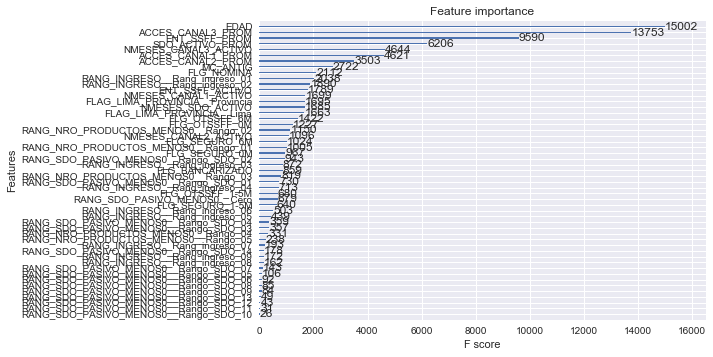

In [47]:
from xgboost import plot_importance

plot_importance(model);

In [59]:
print("Best Logloss: {:.3f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best Logloss: 0.297 in 622 rounds


In [63]:
num_boost_round = model.best_iteration + 1

best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-logloss:0.686917
[1]	Test-logloss:0.680805
[2]	Test-logloss:0.674816
[3]	Test-logloss:0.668942
[4]	Test-logloss:0.663178
[5]	Test-logloss:0.657527
[6]	Test-logloss:0.651985
[7]	Test-logloss:0.646535
[8]	Test-logloss:0.641197
[9]	Test-logloss:0.635952
[10]	Test-logloss:0.630808
[11]	Test-logloss:0.625758
[12]	Test-logloss:0.620808
[13]	Test-logloss:0.615935
[14]	Test-logloss:0.611149
[15]	Test-logloss:0.606443
[16]	Test-logloss:0.60184
[17]	Test-logloss:0.597295
[18]	Test-logloss:0.592826
[19]	Test-logloss:0.588449
[20]	Test-logloss:0.584141
[21]	Test-logloss:0.579909
[22]	Test-logloss:0.575736
[23]	Test-logloss:0.57165
[24]	Test-logloss:0.567636
[25]	Test-logloss:0.563674
[26]	Test-logloss:0.5598
[27]	Test-logloss:0.555972
[28]	Test-logloss:0.552208
[29]	Test-logloss:0.548537
[30]	Test-logloss:0.544904
[31]	Test-logloss:0.541351
[32]	Test-logloss:0.537849
[33]	Test-logloss:0.534397
[34]	Test-logloss:0.531002
[35]	Test-logloss:0.527668
[36]	Test-logloss:0.524381
[37]	Test-loglo

[298]	Test-logloss:0.304574
[299]	Test-logloss:0.304496
[300]	Test-logloss:0.304421
[301]	Test-logloss:0.304327
[302]	Test-logloss:0.304245
[303]	Test-logloss:0.30416
[304]	Test-logloss:0.304075
[305]	Test-logloss:0.303983
[306]	Test-logloss:0.30391
[307]	Test-logloss:0.303828
[308]	Test-logloss:0.303724
[309]	Test-logloss:0.30365
[310]	Test-logloss:0.303564
[311]	Test-logloss:0.303467
[312]	Test-logloss:0.303399
[313]	Test-logloss:0.303307
[314]	Test-logloss:0.303218
[315]	Test-logloss:0.303154
[316]	Test-logloss:0.303065
[317]	Test-logloss:0.303002
[318]	Test-logloss:0.302904
[319]	Test-logloss:0.302821
[320]	Test-logloss:0.302746
[321]	Test-logloss:0.302683
[322]	Test-logloss:0.302604
[323]	Test-logloss:0.302533
[324]	Test-logloss:0.302466
[325]	Test-logloss:0.302395
[326]	Test-logloss:0.302332
[327]	Test-logloss:0.302269
[328]	Test-logloss:0.30221
[329]	Test-logloss:0.302121
[330]	Test-logloss:0.302059
[331]	Test-logloss:0.302006
[332]	Test-logloss:0.301953
[333]	Test-logloss:0.301

[593]	Test-logloss:0.297026
[594]	Test-logloss:0.297023
[595]	Test-logloss:0.297025
[596]	Test-logloss:0.29703
[597]	Test-logloss:0.297031
[598]	Test-logloss:0.297031
[599]	Test-logloss:0.297008
[600]	Test-logloss:0.297009
[601]	Test-logloss:0.297015
[602]	Test-logloss:0.297016
[603]	Test-logloss:0.296997
[604]	Test-logloss:0.297001
[605]	Test-logloss:0.297007
[606]	Test-logloss:0.296998
[607]	Test-logloss:0.296998
[608]	Test-logloss:0.296998
[609]	Test-logloss:0.296987
[610]	Test-logloss:0.296986
[611]	Test-logloss:0.29699
[612]	Test-logloss:0.296992
[613]	Test-logloss:0.296984
[614]	Test-logloss:0.296969
[615]	Test-logloss:0.296973
[616]	Test-logloss:0.296964
[617]	Test-logloss:0.296938
[618]	Test-logloss:0.296937
[619]	Test-logloss:0.296937
[620]	Test-logloss:0.296936
[621]	Test-logloss:0.296927


In [64]:
#Predicting

y_pred = best_model.predict(xgb.DMatrix(x_test_))

In [65]:
submission = pd.DataFrame()
submission['ID_CORRELATIVO'] = x_test_.index
submission['ATTRITION'] = y_pred
submission.head()

,ID_CORRELATIVO,ATTRITION
0,47411,0.360807
1,39861,0.258054
2,38898,0.020847
3,50927,0.024395
4,32969,0.504723


In [66]:
submission.to_csv('./data/submission6.csv', index=False)